## Parameters of experiments

Listed parameters of all experiments:

| Parameter | E_test1 | E_test2 | E_test3 | E_test4 | A_test1 | ET_test1 | ET_test2 | ET_test3 | ET-A_test1 | ET-A_test2 | ET-A_test3 |
|-----------|---------|---------|---------|---------|---------|----------|----------|----------|------------|------------|------------|
| r         | 0       | 0       | 0       | 0       | 0       | 0        | 0        | 0        | 0          | 0          | 0          |
| k         | 1       | 1       | 1       | 1       | 1       | 0.00093  | 0.00093  | 0.00093  | 0.00093    | 0.00093    | 0.00093    |
| d         | 0.0006  | 0.0006  | 0.0006  | 0.003   | 0.003   | 0.003    | 0.003    | 0.003    | 0.003      | 0.003      | 0.003      |
| p         | 170     | 170     | 170     | 170     | 170     | 21       | 21       | 5        | 21         | 21         | 21         |
| m         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 1          | 1          | 1          |
| u         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 1          | 1          | 1          |
| v         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 1          | 1          | 1          |
| s         | 0.0186  | 0.0186  | 0.0186  | 0.093   | 0.093   | 0.093    | 0.093    | 0.093    | 0.093      | 0.093      | 0.093      |
| c         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 1          | 1          | 1          |
| n         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 1          | 1          | 1          |
| h         | 0.000032| 0.000032| 0.000032| 0.000032| 0.000032| 0.000032 | 0.000032 | 0.000032 | 0.000032   | 0.000032   | 0.000032   |
| q         | 1       | 1       | 1       | 1       | 1       | 1        | 1        | 1        | 0.001      | 0.0001     | 0.001      |
| t0        | 0       | 0       | 0       | 0       | 0       | 0        | 0        | 0        | 0          | 0          | 0          |
| T0        | 0       | 0       | 0       | 0       | 0       | 1        | 1        | 1        | 1          | 1          | 0          |
| E0        | 30      | 5       | 170     | 170     | 0       | 30       | 0        | 30       | 0          | 0          | 30         |
| A0        | 0       | 0       | 0       | 0       | 100     | 0        | 0        | 0        | 200        | 2000       | 150        |
| t_end     | 2000    | 14400   | 10000   | 2000    | 21600   | 1440     | 1440     | 1440     | 1440       | 21600      | 21600      |
| dt        | 0.001   | 0.001   | 0.001   | 0.001   | 0.001   | 0.001    | 0.001    | 0.001    | 0.001      | 0.0001     | 0.001      |


## Simulation necessities

In [1]:
# Install necesarry packages
# %pip install pandas
# %pip install matplotlib

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
Path("./fig").mkdir(parents=True, exist_ok=True)

In [4]:
run_all = True
run_ETA = False

In [5]:
# Even though it does not match the conventions in Python coding,
# I choosed to denote konstants (parameters of the model) as
# lowercase chars and the variables as uppercase, as it is used
# in Mayer et al. (1995) for easier interpretation of both the
# code and the equations in the article.

# Params object is used to handle the model parameters all in one.
# It also checks if the assigned parameters fulfill the criteria
# of the model.
class Params:
    """
    This object is used for a simple containment of model's parameters.
    
    Parameters
    ----------
    r, k : float
        non-negative ([0, inf)) constants used in the "dT" equation
    d : float
        positive ((0, inf)) constant used in the 3rd term of the "dE" equation
    p, m, u, v : float
        positive ((0, inf), 1 <= u <= v) constants used in the "f(T)" term of the "dE" equation
    s, c, n : float
        positive ((0, inf), 1 <= n) constants used in the "g(E)" term of the "dE" equation
    q : float
        non-negative ([0, inf]) constant used in both the 4rd term of the "dE" equation
        and the 2nd term of the "dA" equation
    h : float
        non-negative ([0, inf]) constant used in the 1st term of the "dA" equation
    """
    def __init__(
            self,
            r: float, k: float, 
            d: float,
            p: float, m: float, u: float, v: float,
            s: float, c: float, n: float,
            q: float, h: float,
        ):
        """
        Parameters
        ----------
        r, k : float
            non-negative ([0, inf)) constants used in the "dT" equation
        d : float
            positive ((0, inf)) constant used in the 3rd term of the "dE" equation
        p, m, u, v : float
            positive ((0, inf), 1 <= u <= v) constants used in the "f(T)" term of the "dE" equation
        s, c, n : float
            positive ((0, inf), 1 <= n) constants used in the "g(E)" term of the "dE" equation
        q : float
            non-negative ([0, inf]) constant used in both the 4rd term of the "dE" equation
            and the 2nd term of the "dA" equation
        h : float
            non-negative ([0, inf]) constant used in the 1st term of the "dA" equation
        """
        # Check if the constants fulfil the given criteria and assign them as
        # the attributes of the object
        if (r >= 0) & (k >= 0):
            self.r = r
            self.k = k
        else:
            raise Exception("Attribute(s) r, k in an invalid range.")
        
        if (d > 0):
            self.d = d
        else:
            raise Exception("Attribute(s) d in an invalid range.")
        
        if (p > 0) & (m > 0) & (u >= 1) & (v >= u):
            self.p = p
            self.m = m
            self.u = u
            self.v = v
        else:
            raise Exception("Attribute(s) p, m, u, v in an invalid range.")

        if (s > 0) & (c > 0) & (n >= 1):
            self.s = s
            self.c = c
            self.n = n
        else:
            raise Exception("Attribute(s) s, c, n in an invalid range.")
        
        if (q >= 0) & (h >= 0):
            self.q = q
            self.h = h
        else:
            raise Exception("Attribute(s) q, h in an invalid range.")
        
class Simulation:
    """
    This object serves for simple containment
    of simulation settings, e.g. run name and 
    description and model parameters.

    Attributes
    ----------
    name: str
        name of the simulation
    file_path: str
        path of the resulting plot
    params: Params
        parameters of the simulation
    t0: float
        time of the start of the simulation
    T0: float
        T concentration at the beginning of the simulation
    E0: float
        E concentration at the beginning of the simulation
    A0: float
        A concentration at the beginning of the simulation
    t_end: float
        time of the end of the simulation
    dt: float
        timestep of the simulation
    descr: str
        description of the simulation

    """
    def __init__(
            self,
            name: str,
            file_path: str,
            params: Params,
            t0: float = 0.,
            T0: float = 0.,
            E0: float = 0.,
            A0: float = 0.,
            t_end: float = 100.,
            dt: float = .1,
            descr: str = ""
        ):
        self.name = name
        self.file_path = file_path
        self.params = params
        self.t0 = t0
        self.T0 = T0
        self.E0 = E0
        self.A0 = A0
        self.t_end = t_end
        self.dt = dt
        self.descr = descr

In [6]:
# Basic functions, as defined in the pdf of the project
def f(params, T):
    return params.p * T**params.u / (params.m**params.v + T**params.v)
def g(params, E):
    return params.s * E**params.n / (params.c**params.n + E**params.n)
def dT(params, T, E):
    return params.r * T - params.k * T * E
def dE(params, T, E, A):
    return f(params, T) + g(params, E) - params.d * E - params.q * E * A
def dA(params, E, A):
    return -params.h * A - params.q * E * A

# Discretized simulation run
def run(params: Params, t0, T0, E0, A0, t_end, dt: float) -> pd.DataFrame:
    # Compute the number of cycles of the simulation
    nr_cycles = int((t_end-t0)/dt)
    # Prepare the logging structure
    log = {'t': [0], 'T': [T0], 'E': [E0], 'A': [A0]}
    # Assign initial values to the variables
    t, T, E, A = t0, T0, E0, A0
    # Simulation run
    for i in range(nr_cycles):
        # Update the values of the variables according to the equations and the time step dt
        t, T, E, A = t + dt, T + dT(params, T, E) * dt, E + dE(params, T, E, A) * dt, A + dA(params, E, A) * dt
        # Log the values        
        if(t_end-t0>2000):
            if (i%100==0):
                log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
        else:
            log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
    return pd.DataFrame(log)

# Basic line-plot to visualize T, E and A concentrations on time
def visualize_results(s: Simulation, df: pd.DataFrame) -> None:
    # Axis X, Y
    plt.hlines(y=[0], xmin=s.t0, xmax=s.t_end, colors='grey', linestyles='dashed', label='Osy x, y')
    plt.vlines(x=[0], ymin=0, ymax=170, colors='grey', linestyles='dashed')
    # Plot the data
    plt.plot(df['t'], df['T'], label='T', color='red')
    plt.plot(df['t'], df['E'], label='E', color='blue')
    plt.plot(df['t'], df['A'], label='A', color='green')
    # Plot support lines
    plt.hlines(y=[30, 85, 170], xmin=s.t0, xmax=s.t_end, colors='dodgerblue', linestyles='dashed', label='30, 85, 170')
    plt.vlines(x=[30, 1440], ymin = 0, ymax=170, colors='lightskyblue', linestyles='dashed', label='Minuta 30 a 1440')

    plt.title(f'Simulace ET-A modelu při nastavení "{s.name}"')
    plt.legend()
    #plt.show()
    plt.savefig(s.file_path, dpi=600)

# Simple function to run the simulation and postprocess its data
def sim(s: Simulation):
    df = run(s.params, s.t0, s.T0, s.E0, s.A0, s.t_end, s.dt)
    visualize_results(s, df)
    #print(df.describe())

## Experiments
### E testing
To test $E$ independently on influence of $T$ and $A$, new configured functions were made - the `run_E_only` function sets $T$ and $A$ in all steps to $0$, the `visualize_results_E_only` visualizes only $E$ and `sim_E_only` uses the mentioned above to run the simulation.

In [7]:
# Discretized simulation run
def run_E_only(params: Params, t0, T0, E0, A0, t_end, dt: float) -> pd.DataFrame:
    # Compute the number of cycles of the simulation
    nr_cycles = int((t_end-t0)/dt)
    # Prepare the logging structure
    log = {'t': [0], 'T': [T0], 'E': [E0], 'A': [A0]}
    # Assign initial values to the variables
    t, T, E, A = t0, T0, E0, A0
    # Simulation run
    for i in range(nr_cycles):
        # Update the values of the variables according to the equations and the time step dt
        t, T, E, A = t + dt, 0, E + dE(params, T, E, A) * dt, 0 # test E
        # Log the values
        if(t_end-t0>2000):
            if (i%100==0):
                log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
        else:
            log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
    return pd.DataFrame(log)

# Basic line-plot to visualize T, E and A concentrations on time
def visualize_results_E_only(s: Simulation, df: pd.DataFrame) -> None:
    # Axis X, Y
    plt.hlines(y=[0], xmin=s.t0, xmax=s.t_end, colors='grey', linestyles='dashed', label='Osy x, y')
    plt.vlines(x=[0], ymin=0, ymax=170, colors='grey', linestyles='dashed')
    # Plot the data
    plt.plot(df['t'], df['E'], label='E', color='blue')
    # Plot support lines
    plt.hlines(y=[30, 170], xmin=s.t0, xmax=s.t_end, colors='dodgerblue', linestyles='dashed', label='30, 170')
    plt.vlines(x=[1440], ymin = 0, ymax=170, colors='lightskyblue', linestyles='dashed', label='Minuta 1440')
    plt.title(f'Simulace ET-A modelu při nastavení "{s.name}"')
    plt.legend()
    plt.savefig(s.file_path, dpi=600)

# Simple function to run the simulation and postprocess its data
def sim_E_only(s: Simulation):
    df = run_E_only(s.params, s.t0, s.T0, s.E0, s.A0, s.t_end, s.dt)
    visualize_results_E_only(s, df)
    #print(df.describe())
    print(f'Value of E at time 1440:', df[(df['t']>=1440)&(df['t']<1441)]['E'].iloc[0])

Value of E at time 1440: 30.0


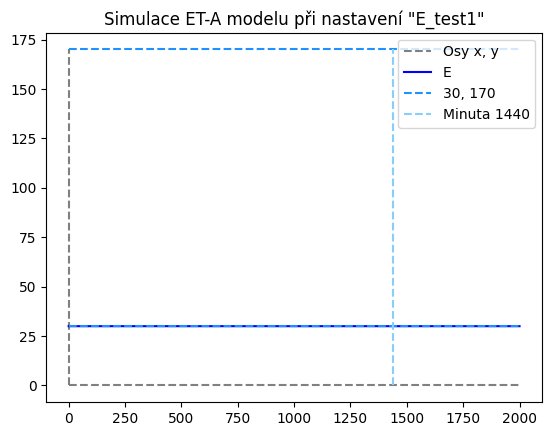

In [8]:
simulation_E_test1 = Simulation(
    name='E_test1',
    file_path='fig/E_test1.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = 1.,
        # d - self decay of E
        d = 6e-4,
        # p - "maximum" added by f(T), m - "slowing E",
        # u,v=1 => f(T) goes to p
        p = 170, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=0,
    E0=30,
    A0=0,
    t_end=2000.,
    dt=.001,
)
run_E_test1=False
if run_all | run_E_test1:
    sim_E_only(simulation_E_test1)

Value of E at time 1440: 18.694518340406503


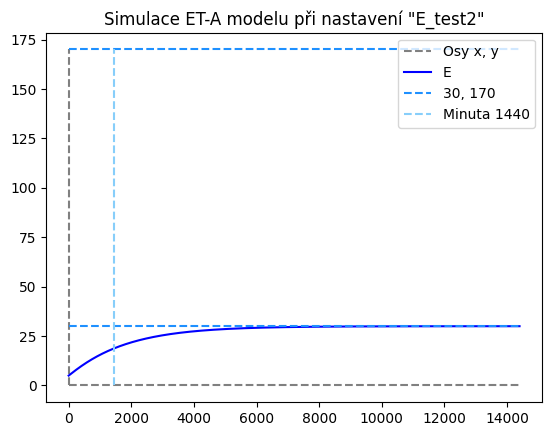

In [9]:
simulation_E_test2 = Simulation(
    name='E_test2',
    file_path='fig/E_test2.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = 1.,
        # d - self decay of E
        d = 6e-4,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 170, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=0,
    E0=5,
    A0=0,
    t_end=60*24*10,
    dt=.001,
)
run_E2 = False
if run_all | run_E2:
    sim_E_only(simulation_E_test2)


Value of E at time 1440: 89.42955620921079


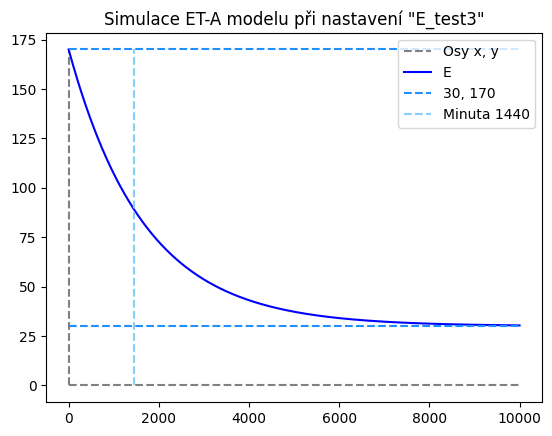

In [10]:
simulation_E_test3 = Simulation(
    name='E_test3',
    file_path='fig/E_test3.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = 1.,
        # d - self decay of E
        d = 6e-4,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 170, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=0,
    E0=170,
    A0=0,
    t_end=10000.,
    dt=.001,
)
run_E_test3 = False
if run_all | run_E_test3:
    sim_E_only(simulation_E_test3)


Value of E at time 1440: 32.02818964489054


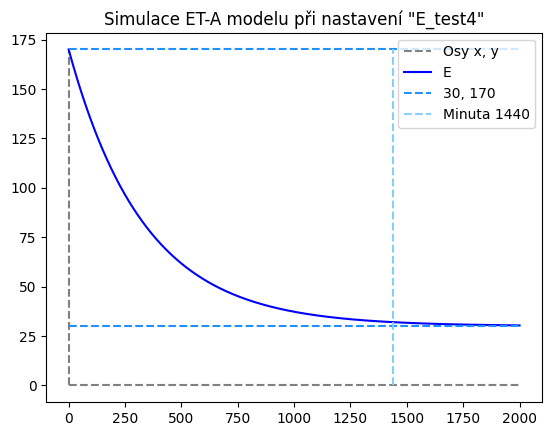

In [11]:
simulation_E_test4 = Simulation(
    name='E_test4',
    file_path='fig/E_test4.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = 1.,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 170, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=0,
    E0=170,
    A0=0,
    t_end=2000.,
    dt=.001,
)
if run_all:
    sim_E_only(simulation_E_test4) # This worked out
#sim(simulation_E_test4) # This worked out


### A testing
To test $A$ independently on influence of $T$ and $E$, new configured functions were made - the `run_A_only` function sets $T$ and $E$ in all steps to $0$, the `visualize_results_A_only` visualizes only $A$ and `sim_A_only` uses the mentioned above to run the simulation.

In [12]:
# Discretized simulation run
def run_A_only(params: Params, t0, T0, E0, A0, t_end, dt: float) -> pd.DataFrame:
    # Compute the number of cycles of the simulation
    nr_cycles = int((t_end-t0)/dt)
    # Prepare the logging structure
    log = {'t': [0], 'T': [T0], 'E': [E0], 'A': [A0]}
    # Assign initial values to the variables
    t, T, E, A = t0, T0, E0, A0
    # Simulation run
    for i in range(nr_cycles):
        # Update the values of the variables according to the equations and the time step dt
        t, T, E, A = t + dt, 0, 0, A + dA(params, E, A) * dt # test A
        # Log the values
        if(t_end-t0>2000):
            if (i%100==0):
                log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
        else:
            log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
    return pd.DataFrame(log)

# Basic line-plot to visualize T, E and A concentrations on time
def visualize_results_A_only(s: Simulation, df: pd.DataFrame) -> None:
    # Axis X, Y
    plt.hlines(y=[0], xmin=s.t0, xmax=s.t_end, colors='grey', linestyles='dashed', label='Osy x, y')
    plt.vlines(x=[0], ymin=0, ymax=100, colors='grey', linestyles='dashed')
    # Plot the data
    plt.plot(df['t'], df['A'], label='A', color='green')
    # Plot support lines
    plt.hlines(y=[100, 50], xmin=s.t0, xmax=s.t_end, colors='olivedrab', linestyles='dashed', label='50, 100')
    plt.vlines(x=[60*24*15], ymin = 0, ymax=100, colors='olive', linestyles='dashed', label='15 dní')

    plt.title(f'Simulace ET-A modelu při nastavení "{s.name}"')
    plt.legend()
    #plt.show()
    plt.savefig(s.file_path, dpi=600)

# Simple function to run the simulation and postprocess its data
def sim_A_only(s: Simulation):
    df = run_A_only(s.params, s.t0, s.T0, s.E0, s.A0, s.t_end, s.dt)
    visualize_results_A_only(s, df)
    #print(df.describe())

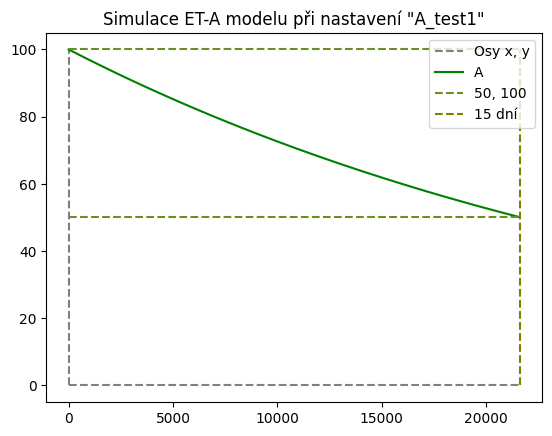

In [13]:
simulation_A_test1 = Simulation(
    name='A_test1',
    file_path='fig/A_test1.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = 1.,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 170, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=0,
    E0=0,
    A0=100,
    t_end=1440*15,
    dt=.001,
)
if run_all:
    sim_A_only(simulation_A_test1) # Good


### T and E testing
To test $E$ and $T$ independently on influence of $A$, new configured functions were made - the `run_ET_only` function sets $A$ in all steps to $0$, the `visualize_results_ET_only` visualizes only $E$ and $T$ and `sim_ET_only` uses the mentioned above to run the simulation.

In [14]:
# Discretized simulation run
def run_ET_only(params: Params, t0, T0, E0, A0, t_end, dt: float) -> pd.DataFrame:
    # Compute the number of cycles of the simulation
    nr_cycles = int((t_end-t0)/dt)
    # Prepare the logging structure
    log = {'t': [0], 'T': [T0], 'E': [E0], 'A': [A0]}
    # Assign initial values to the variables
    t, T, E, A = t0, T0, E0, A0
    # Simulation run
    for i in range(nr_cycles):
        # Update the values of the variables according to the equations and the time step dt
        t, T, E, A = t + dt, T + dT(params, T, E) * dt, E + dE(params, T, E, A) * dt, 0
        # Log the values
        if(t_end-t0>2000):
            if (i%100==0):
                log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
        else:
            log['t'].append(t), log['T'].append(T), log['E'].append(E), log['A'].append(A)
    return pd.DataFrame(log)

# Basic line-plot to visualize T, E and A concentrations on time
def visualize_results_ET_only(s: Simulation, df: pd.DataFrame) -> None:
    # Axis X, Y
    plt.hlines(y=[0], xmin=s.t0, xmax=s.t_end, colors='grey', linestyles='dashed', label='Osy x, y')
    plt.vlines(x=[0], ymin=0, ymax=170, colors='grey', linestyles='dashed')
    # Plot the data
    plt.plot(df['t'], df['T'], label='T', color='red')
    plt.plot(df['t'], df['E'], label='E', color='blue')
    # Plot support lines
    plt.hlines(y=[30, 85, 170], xmin=s.t0, xmax=s.t_end, colors='dodgerblue', linestyles='dashed', label='30, 85, 170')
    plt.vlines(x=[30, 1440], ymin = 0, ymax=170, colors='lightskyblue', linestyles='dashed', label='Minuta 30 a 1440')

    plt.title(f'Simulace ET-A modelu při nastavení "{s.name}"')
    plt.legend()
    #plt.show()
    plt.savefig(s.file_path, dpi=600)

# Simple function to run the simulation and postprocess its data
def sim_ET_only(s: Simulation):
    df = run_ET_only(s.params, s.t0, s.T0, s.E0, s.A0, s.t_end, s.dt)
    visualize_results_ET_only(s, df)
    print(
        f'Value of E at time 30, 1440:',
        df[(df['t']>=30)&(df['t']<31)]['E'].iloc[0],
        df[(df['t']>=1439)&(df['t']<=1440)]['E'].iloc[-1],
        f'\nMax value of E (is) at time:',
        df['E'].max(),
        df['t'].iloc[df['E'].argmax()],
    )
    #print(df.describe())

Value of E at time 30, 1440: 168.5426222473018 32.24821010467989 
Max value of E (is) at time: 168.6850427966138 32.008000000016104


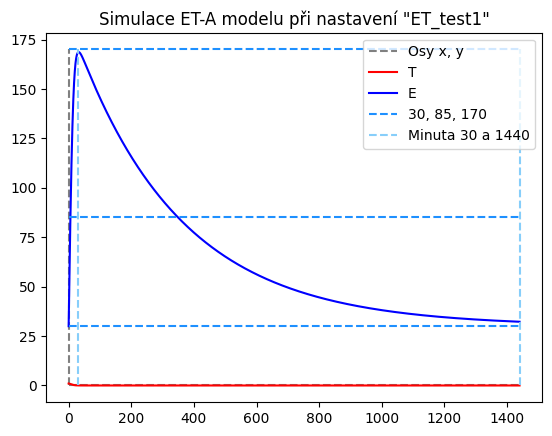

In [15]:
# Configuring the k and p parameters - asthma guy
simulation_ET_test1 = Simulation(
    name='ET_test1',
    file_path='fig/ET_test1.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 21, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=1,
    E0=30,
    A0=0,
    t_end=60*24,
    dt=.001,
)
if run_all:
    sim_ET_only(simulation_ET_test1) # Good

Value of E at time 30, 1440: 165.19663290977564 32.230375148171525 
Max value of E (is) at time: 166.25126758562118 35.11100000000887


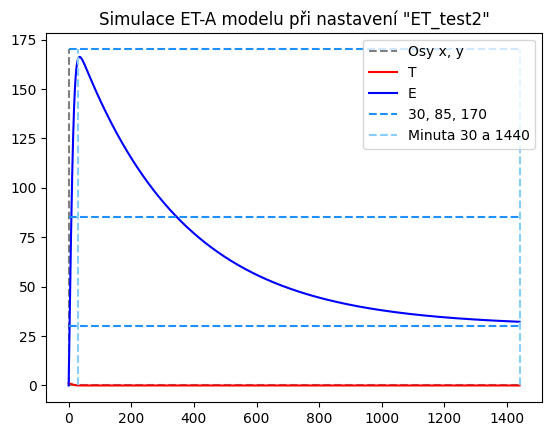

In [16]:
# tryptase levels increase from 0 when added T
simulation_ET_test2 = Simulation(
    name='ET_test2',
    file_path='fig/ET_test2.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 21, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=1,
    E0=0,
    A0=0,
    t_end=60*24,
    dt=.001,
)
run_ET2 = False
if run_all | run_ET2:
    sim_ET_only(simulation_ET_test2) # Good

Value of E at time 30, 1440: 78.20444274187835 30.971540717327848 
Max value of E (is) at time: 84.11754498457985 53.00099999996718


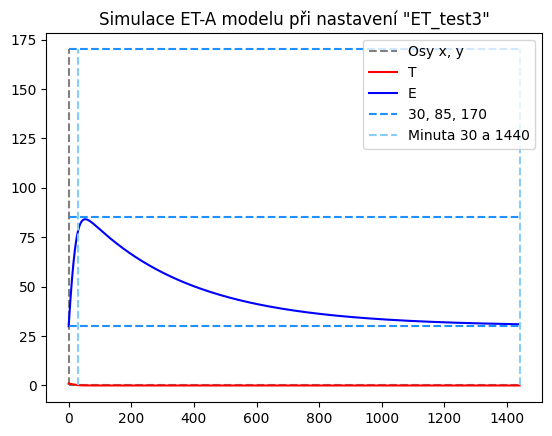

In [17]:
# Configuring the k and p parameters for non-astma person (E<85)
simulation_ET_test3 = Simulation(
    name='ET_test3',
    file_path='fig/ET_test3.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 5, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 1,
    ),
    t0=0,
    T0=1,
    E0=30,
    A0=0,
    t_end=60*24,
    dt=.001,
)
run_ET3 = False
if run_all | run_ET3:
    sim_ET_only(simulation_ET_test3)

### ET-A together

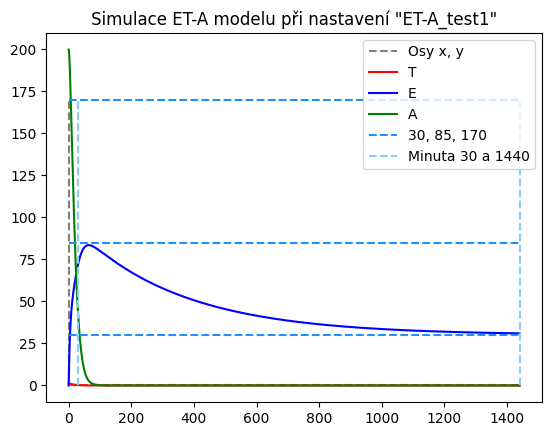

In [18]:
# Set A dosage and q so the asthma reaction is similar to a healthy person (E under 85)
simulation_ET_A_test1 = Simulation(
    name='ET-A_test1',
    file_path='fig/ET-A_test1.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 21, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 0.001,
    ),
    t0=0,
    T0=1,
    E0=0,
    A0=200,
    t_end=60*24,
    dt=.001,
)
run_ETA1 = False
if run_all | run_ETA | run_ETA1:
    sim(simulation_ET_A_test1) # Good

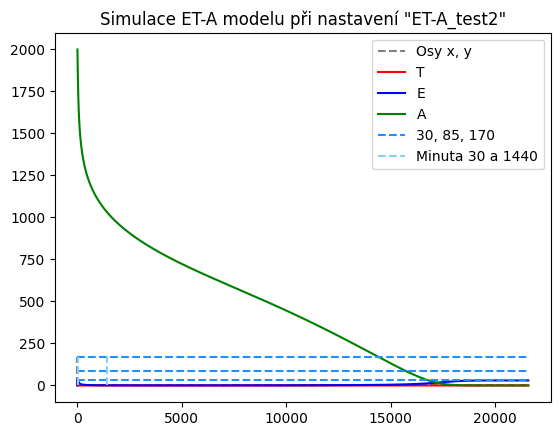

In [19]:
# Set A dosage and q so the asthma reaction is reduced to 30 and it remains reduced even after
simulation_ET_A_test2 = Simulation(
    name='ET-A_test2',
    file_path='fig/ET-A_test2.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 21, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 0.0001,
    ),
    t0=0,
    T0=1,
    E0=0,
    A0=2000,
    t_end=60*24*15,
    dt=.0001,
)
run_ETA2 = False
if run_all | run_ETA | run_ETA2:
    sim(simulation_ET_A_test2) # Good

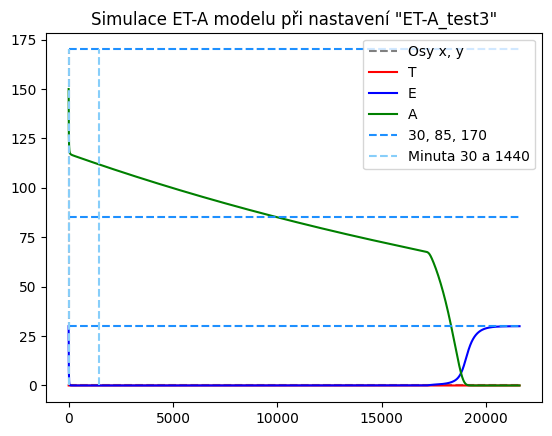

In [20]:
# Set A dosage and q so the E is reduced - no T added
simulation_ET_A_test3 = Simulation(
    name='ET-A_test3',
    file_path='fig/ET-A_test3.png',
    params=Params(
        # r - growth of T, k - kill of T by E
        r = .0, k = .00093,
        # d - self decay of E
        d = 6e-4*5,
        # p - "maximum" added by f(T), m - "slowing E", u,v=1 => f(T) goes to p
        p = 21, m = 1, u = 1, v = 1,
        # s - how much is the E stimulated by itself
        s = 1.86e-2*5, c = 1, n = 1,
        # h - how much is A degraded, q - how efective is A against E
        h = 3.2e-5, q = 0.001,
    ),
    t0=0,
    T0=0,
    E0=30,
    A0=150,
    t_end=60*24*15,
    dt=.001,
)
run_ETA3 = True
if run_all | run_ETA | run_ETA3:
    sim(simulation_ET_A_test3) # Good